# 판다스

1. 설치해야 하는 라이브러리
2. 자료구조 : 시리즈, 데이터프레임

In [4]:
import pandas as pd

# 1. 데이터 읽기

In [5]:
df = pd.read_csv('./data/gapminder.tsv', sep='\t')
type(df)

pandas.core.frame.DataFrame

In [9]:
df.head() #위의 5건 출력 - default, subset

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


## 1.1 데이터프레임 이해하기

In [6]:
df.shape # (row,col), 건수, 항목수

(1704, 6)

In [7]:
df.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')

In [10]:
df.dtypes

country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object

EDA 탐색적 데이터 분석 -  shape, columns, dtypes

dtype object : str

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


## 1.2 데이터 추출하기

### 1.2.1 열추출

In [14]:
type(df['country']) #시리즈객체

pandas.core.series.Series

In [15]:
df1 = df['country']
df1.head()

0    Afghanistan
1    Afghanistan
2    Afghanistan
3    Afghanistan
4    Afghanistan
Name: country, dtype: object

In [18]:
df[ ['country', 'continent'] ]  # [속성목록] 이용해서 데이터프레임 추출

,country,continent
0,Afghanistan,Asia
1,Afghanistan,Asia
2,Afghanistan,Asia
3,Afghanistan,Asia
4,Afghanistan,Asia
...,...,...
1699,Zimbabwe,Africa
1700,Zimbabwe,Africa
1701,Zimbabwe,Africa
1702,Zimbabwe,Africa


In [50]:
#보고 싶은 컬럼 4개를 추출한 서브셋을 생성
df.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')

In [20]:
df2 = df[ [ 'country', 'year', 'lifeExp', 'gdpPercap' ] ]
df2.head()

,country,year,lifeExp,gdpPercap
0,Afghanistan,1952,28.801,779.445314
1,Afghanistan,1957,30.332,820.853030
2,Afghanistan,1962,31.997,853.100710
3,Afghanistan,1967,34.020,836.197138
4,Afghanistan,1972,36.088,739.981106


In [21]:
type(df1), type(df2)

(pandas.core.series.Series, pandas.core.frame.DataFrame)

### 1.2.2 행추출

1. loc [ 행 이름 ], default rangeindex -> number, 인덱스의 이름을 변경 -> 이름으로 추출
2. iloc [ 행번호 ] 

In [6]:
df.loc[ 0 ]

country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap     779.445314
Name: 0, dtype: object

In [7]:
#100번째 행 추출
df.loc[ 99 ]

country      Bangladesh
continent          Asia
year               1967
lifeExp          43.453
pop            62821884
gdpPercap    721.186086
Name: 99, dtype: object

In [13]:
# - index

#df.loc[ -1 ]
df.loc[   df.shape[ 0 ] - 1  ] #row 수

country        Zimbabwe
continent        Africa
year               2007
lifeExp          43.487
pop            12311143
gdpPercap    469.709298
Name: 1703, dtype: object

In [14]:
#여러 행을 추출 - [] 로 지정
df.loc[ [0,1,4] ]


,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [15]:
#현재 데이터프레임에서는 loc[] iloc[]가 동일
df.iloc[ [0,1,4] ]

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [51]:
# loc[], iloc[] 의 차이는 컬럼을 꺼내는 방식

df.loc[ [0] , [ 'country' ]   ]  #행, 열을 같이 지정해서 추출 ,로 구분


,country
0,Afghanistan


In [18]:
df.iloc[  [0] , [ 0 ]      ]

,country
0,Afghanistan


In [21]:
# slicing  :  colon
df.loc[ :10 ,  [ 'country' ]  ] # 전체일때는 : 표시 (시작,끝 생략)

,country
0,Afghanistan
1,Afghanistan
2,Afghanistan
3,Afghanistan
4,Afghanistan
5,Afghanistan
6,Afghanistan
7,Afghanistan
8,Afghanistan
9,Afghanistan


In [ ]:
df.iloc[ :10 ,  [ 0 ]  ] 

### 1.2.3 range()

In [28]:
r_list = list(range(1,5,2)) #step의 사용
df.iloc[ :, r_list ]

,continent,lifeExp
0,Asia,28.801
1,Asia,30.332
2,Asia,31.997
3,Asia,34.020
4,Asia,36.088
...,...,...
1699,Africa,62.351
1700,Africa,60.377
1701,Africa,46.809
1702,Africa,39.989


In [31]:
df

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [30]:
df.iloc[ : , ::2 ]  # :을 이용한 slicing 구문 

,country,year,pop
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083
3,Afghanistan,1967,11537966
4,Afghanistan,1972,13079460
...,...,...,...
1699,Zimbabwe,1987,9216418
1700,Zimbabwe,1992,10704340
1701,Zimbabwe,1997,11404948
1702,Zimbabwe,2002,11926563


In [32]:
#iloc로 'gdpPercap' 속성의 처음 10개행 추출

df.iloc[ :10, [-1]]

,gdpPercap
0,779.445314
1,820.853030
2,853.100710
3,836.197138
4,739.981106
5,786.113360
6,978.011439
7,852.395945
8,649.341395
9,635.341351


## 1.3 기초 통계 계산하기

In [33]:
#descriptive - numeric data
# 전체 데이터의 요약

df.describe()

,year,lifeExp,pop,gdpPercap
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165876
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846988
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


In [34]:
#그룹화 > df 분할 > 통계
#연도별 기대수명 평균
#대륙별 국가 갯수
df

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [37]:
df.groupby('year')[ 'lifeExp' ].mean()

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [42]:
# 대륙별 인구pop 의 최대값
df.groupby('continent')['pop'].max().sort_index(ascending=False)

continent
Oceania       20434176
Europe        82400996
Asia        1318683096
Americas     301139947
Africa       135031164
Name: pop, dtype: int64

In [43]:
#최대값 기준으로 정렬하기
df.groupby('continent')['pop'].max().sort_values(ascending=False)

continent
Asia        1318683096
Americas     301139947
Africa       135031164
Europe        82400996
Oceania       20434176
Name: pop, dtype: int64

In [44]:
# 빈도수 계산 nunique()
df.groupby('continent')['country'].nunique()

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64

In [46]:
#value_counts()

df.groupby('continent')['country'].value_counts()

continent  country       
Africa     Algeria           12
           Angola            12
           Benin             12
           Botswana          12
           Burkina Faso      12
                             ..
Europe     Switzerland       12
           Turkey            12
           United Kingdom    12
Oceania    Australia         12
           New Zealand       12
Name: country, Length: 142, dtype: int64

### 1.4 그래프로 그리기

In [49]:
year_lifeExp_mean = df.groupby('year')[ 'lifeExp' ].mean()
year_lifeExp_mean

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

<Axes: xlabel='year'>

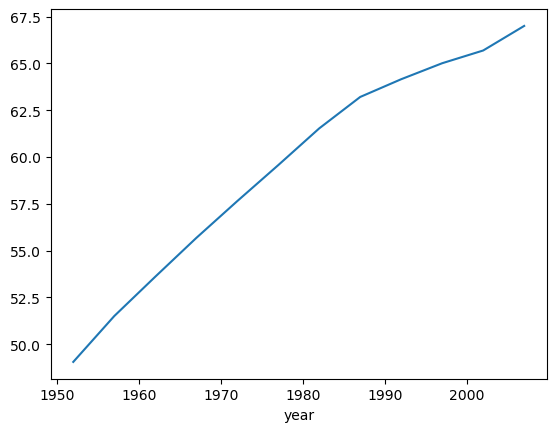

In [48]:
year_lifeExp_mean.plot()

# 2. 데이터 다루기

## 2.1 시리즈 만들기

- 1차원 자료 : 리스트 유사, 넘파이의 어레이를 기본으로 만들어짐
- 한 열의 데이터는 모두 동일한 타입
- 

In [53]:
import pandas as pd

In [56]:
s = pd.Series( ['banana', 10] )
type(s)

pandas.core.series.Series

In [57]:
s #RangeIndex

0    banana
1        10
dtype: object

In [58]:
s1 = pd.Series( data= ['홍길동','김길동'] , index= ['a', 'b'] )
s1

a    홍길동
b    김길동
dtype: object

In [59]:
s1.head()

a    홍길동
b    김길동
dtype: object

In [60]:
s1.info()

<class 'pandas.core.series.Series'>
Index: 2 entries, a to b
Series name: None
Non-Null Count  Dtype 
--------------  ----- 
2 non-null      object
dtypes: object(1)
memory usage: 140.0+ bytes


In [62]:
s1.loc['a']

'홍길동'

In [64]:
s1.iloc[0]

'홍길동'

## 2.2 데이터프레임 만들기

In [67]:
scientists = pd.DataFrame({
        "Name": ["Rosaline Franklin", "William Gosset"],
        "Occupation": ["Chemist", "Statistician"],
        "Born": ["1920-07-25", "1876-06-13"],
        "Died": ["1958-04-16", "1937-10-16"],
        "Age": [37, 61],
})

In [68]:
scientists.columns

Index(['Name', 'Occupation', 'Born', 'Died', 'Age'], dtype='object')

In [72]:
scientists

,Name,Occupation,Born,Died,Age
0,Rosaline Franklin,Chemist,1920-07-25,1958-04-16,37
1,William Gosset,Statistician,1876-06-13,1937-10-16,61


In [73]:
scientists.index = ["Rosaline Franklin", "William Gosset"]

In [74]:
scientists

,Name,Occupation,Born,Died,Age
Rosaline Franklin,Rosaline Franklin,Chemist,1920-07-25,1958-04-16,37
William Gosset,William Gosset,Statistician,1876-06-13,1937-10-16,61


In [70]:
#name column 을 인덱스로 지정해서 데이터 프레임 생성하기
scient1 = pd.DataFrame(
    data = {
        "Occupation": ["Chemist", "Statistician"],
        "Born": ["1920-07-25", "1876-06-13"],
        "Died": ["1958-04-16", "1937-10-16"],
        "Age": [37, 61],
    }
    ,
    index = ["Rosaline Franklin", "William Gosset"]
)

In [71]:
scient1

,Occupation,Born,Died,Age
Rosaline Franklin,Chemist,1920-07-25,1958-04-16,37
William Gosset,Statistician,1876-06-13,1937-10-16,61


In [79]:
f_row = scient1.loc['Rosaline Franklin']#, iloc[]
f_row.values

array(['Chemist', '1920-07-25', '1958-04-16', 37], dtype=object)

In [80]:
f_row.index

Index(['Occupation', 'Born', 'Died', 'Age'], dtype='object')

In [81]:
f_row.keys()

Index(['Occupation', 'Born', 'Died', 'Age'], dtype='object')

In [83]:
scient1

,Occupation,Born,Died,Age
Rosaline Franklin,Chemist,1920-07-25,1958-04-16,37
William Gosset,Statistician,1876-06-13,1937-10-16,61


In [86]:
scient1.loc[:,'Age']

Rosaline Franklin    37
William Gosset       61
Name: Age, dtype: int64

In [88]:
age = scient1['Age']
age.mean() #평균, 최소값, 최대값, 표준편차

49.0

In [89]:
scient2 = pd.read_csv('./data/scientists.csv')

In [96]:
scient2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        8 non-null      object
 1   Born        8 non-null      object
 2   Died        8 non-null      object
 3   Age         8 non-null      int64 
 4   Occupation  8 non-null      object
dtypes: int64(1), object(4)
memory usage: 452.0+ bytes


In [91]:
scient2.head(3)

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse


In [93]:
ages = scient2['Age']
ages

0    37
1    61
2    90
3    66
4    56
5    45
6    41
7    77
Name: Age, dtype: int64

In [94]:
ages.describe() #기술통계량 확인, ages.mean()

count     8.000000
mean     59.125000
std      18.325918
min      37.000000
25%      44.000000
50%      58.500000
75%      68.750000
max      90.000000
Name: Age, dtype: float64

In [95]:
ages[  ages > ages.mean()  ]  #벡터화, 불리언값 리스트

1    61
2    90
3    66
7    77
Name: Age, dtype: int64

In [97]:
ages + ages #element wise - vector + vector - rank1 array

0     74
1    122
2    180
3    132
4    112
5     90
6     82
7    154
Name: Age, dtype: int64

In [98]:
ages + 10 #vector + scalar > broadcasting 

0     47
1     71
2    100
3     76
4     66
5     55
6     51
7     87
Name: Age, dtype: int64

In [100]:
s1 = pd.Series([1,100])
s1

0      1
1    100
dtype: int64

In [101]:
ages + s1 #넘파이의 브로드캐스팅과 차이, 반드시 벡터의 길이가 같아야 한다.

0     38.0
1    161.0
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
dtype: float64

## 2.3 인덱스

In [103]:
#default 는 index 기준 정렬
ages

0    37
1    61
2    90
3    66
4    56
5    45
6    41
7    77
Name: Age, dtype: int64

In [109]:
rev_ages = ages.sort_index(ascending=False)
rev_ages

7    77
6    41
5    45
4    56
3    66
2    90
1    61
0    37
Name: Age, dtype: int64

In [107]:
ages*2

0     74
1    122
2    180
3    132
4    112
5     90
6     82
7    154
Name: Age, dtype: int64

In [108]:
ages + rev_ages  #같은 인덱스를 기준으로 자동 정렬, 연산 수행

0     74
1    122
2    180
3    132
4    112
5     90
6     82
7    154
Name: Age, dtype: int64

In [110]:
first_half = scient2[:4]
second_half = scient2[4:]
first_half

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist


In [128]:
pd.concat([first_half, second_half])

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist
5,John Snow,1813-03-15,1858-06-16,45,Physician
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician


In [112]:
scient2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        8 non-null      object
 1   Born        8 non-null      object
 2   Died        8 non-null      object
 3   Age         8 non-null      int64 
 4   Occupation  8 non-null      object
dtypes: int64(1), object(4)
memory usage: 452.0+ bytes


In [111]:
#데이터프레임에 스칼라 연산 - column의 type에 따라 연산
scient2*2

,Name,Born,Died,Age,Occupation
0,Rosaline FranklinRosaline Franklin,1920-07-251920-07-25,1958-04-161958-04-16,74,ChemistChemist
1,William GossetWilliam Gosset,1876-06-131876-06-13,1937-10-161937-10-16,122,StatisticianStatistician
2,Florence NightingaleFlorence Nightingale,1820-05-121820-05-12,1910-08-131910-08-13,180,NurseNurse
3,Marie CurieMarie Curie,1867-11-071867-11-07,1934-07-041934-07-04,132,ChemistChemist
4,Rachel CarsonRachel Carson,1907-05-271907-05-27,1964-04-141964-04-14,112,BiologistBiologist
5,John SnowJohn Snow,1813-03-151813-03-15,1858-06-161858-06-16,90,PhysicianPhysician
6,Alan TuringAlan Turing,1912-06-231912-06-23,1954-06-071954-06-07,82,Computer ScientistComputer Scientist
7,Johann GaussJohann Gauss,1777-04-301777-04-30,1855-02-231855-02-23,154,MathematicianMathematician


In [113]:
#숫자로 구성한 데이터프레임의 더하기 연산 + , add()
df1 = df2 = pd.DataFrame(
                data = [[1,2,3],[4,5,6]]
            )
df1.add(df2)

,0,1,2
0,2,4,6
1,8,10,12


## 2.4 열추가

In [116]:
scient2.head(3)

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse


In [117]:
#str > datetime
born_datetime = pd.to_datetime( scient2['Born'], format='%Y-%m-%d' )
born_datetime

0   1920-07-25
1   1876-06-13
2   1820-05-12
3   1867-11-07
4   1907-05-27
5   1813-03-15
6   1912-06-23
7   1777-04-30
Name: Born, dtype: datetime64[ns]

In [119]:
scient2['born_dt'] = born_datetime
scient2.head(3)

,Name,Born,Died,Age,Occupation,born_dt
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,1920-07-25
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,1876-06-13
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,1820-05-12


In [120]:
scient2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Name        8 non-null      object        
 1   Born        8 non-null      object        
 2   Died        8 non-null      object        
 3   Age         8 non-null      int64         
 4   Occupation  8 non-null      object        
 5   born_dt     8 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 516.0+ bytes


In [131]:
scient2['died_dt']  = pd.to_datetime( scient2['Died'], format='%Y-%m-%d' )
scient2

,Name,Born,Died,Age,Occupation,born_dt,died_dt,age_days
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,1920-07-25,1958-04-16,37.0
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,1876-06-13,1937-10-16,61.0
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,1820-05-12,1910-08-13,90.0
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist,1867-11-07,1934-07-04,66.0
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist,1907-05-27,1964-04-14,56.0
5,John Snow,1813-03-15,1858-06-16,45,Physician,1813-03-15,1858-06-16,45.0
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist,1912-06-23,1954-06-07,41.0
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician,1777-04-30,1855-02-23,77.0


In [136]:
scient2['age_days'] = scient2['died_dt'] - scient2['born_dt'] 
scient2['age_days'].dtype

dtype('<m8[ns]')

In [134]:
#series.apply(함수)
import numpy as np

scient2['age_days'] = (scient2['age_days'].dt.days / 365).apply( np.floor ) #numpy의 수학함수
scient2['age_days'].dtypes

dtype('float64')

In [140]:
#df.assign( col_name = 수식), col_name은 새로 만들어짐.

scient2.assign(
    age_days_assign = scient2['died_dt'] - scient2['born_dt'] ,
    age_assign = (scient2['age_days'].dt.days / 365).apply( np.floor ) #임시컬럼을 따로 만든다.
)

,Name,Born,Died,Age,Occupation,born_dt,died_dt,age_days,age_days_assign,age_assign
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,1920-07-25,1958-04-16,13779 days,13779 days,37.0
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,1876-06-13,1937-10-16,22404 days,22404 days,61.0
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,1820-05-12,1910-08-13,32964 days,32964 days,90.0
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist,1867-11-07,1934-07-04,24345 days,24345 days,66.0
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist,1907-05-27,1964-04-14,20777 days,20777 days,56.0
5,John Snow,1813-03-15,1858-06-16,45,Physician,1813-03-15,1858-06-16,16529 days,16529 days,45.0
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist,1912-06-23,1954-06-07,15324 days,15324 days,41.0
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician,1777-04-30,1855-02-23,28422 days,28422 days,77.0


In [146]:
#df.assign( col_name = 수식), col_name은 새로 만들어짐.

scient2 = scient2.assign(
    age_days_assign = scient2['died_dt'] - scient2['born_dt'] ,
    #기존의 컬럼을 이용해서 계산한 결과를 새로운 컬럼에 할당
    age_assign = ((scient2['died_dt'] - scient2['born_dt']).dt.days / 365).apply( np.floor ) 
)


In [147]:
scient2

,Name,Born,Died,Age,Occupation,born_dt,died_dt,age_days,age_days_assign,age_assign
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,1920-07-25,1958-04-16,13779 days,13779 days,37.0
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,1876-06-13,1937-10-16,22404 days,22404 days,61.0
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,1820-05-12,1910-08-13,32964 days,32964 days,90.0
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist,1867-11-07,1934-07-04,24345 days,24345 days,66.0
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist,1907-05-27,1964-04-14,20777 days,20777 days,56.0
5,John Snow,1813-03-15,1858-06-16,45,Physician,1813-03-15,1858-06-16,16529 days,16529 days,45.0
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist,1912-06-23,1954-06-07,15324 days,15324 days,41.0
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician,1777-04-30,1855-02-23,28422 days,28422 days,77.0


## 2.5 열 삭제

In [145]:
scient3_d = scient2.drop( ['Age'] , axis='columns') # 1
scient3_d #삭제된 데이터프레임

,Name,Born,Died,Occupation,born_dt,died_dt,age_days
0,Rosaline Franklin,1920-07-25,1958-04-16,Chemist,1920-07-25,1958-04-16,13779 days
1,William Gosset,1876-06-13,1937-10-16,Statistician,1876-06-13,1937-10-16,22404 days
2,Florence Nightingale,1820-05-12,1910-08-13,Nurse,1820-05-12,1910-08-13,32964 days
3,Marie Curie,1867-11-07,1934-07-04,Chemist,1867-11-07,1934-07-04,24345 days
4,Rachel Carson,1907-05-27,1964-04-14,Biologist,1907-05-27,1964-04-14,20777 days
5,John Snow,1813-03-15,1858-06-16,Physician,1813-03-15,1858-06-16,16529 days
6,Alan Turing,1912-06-23,1954-06-07,Computer Scientist,1912-06-23,1954-06-07,15324 days
7,Johann Gauss,1777-04-30,1855-02-23,Mathematician,1777-04-30,1855-02-23,28422 days


In [144]:
scient2 #그대로

,Name,Born,Died,Age,Occupation,born_dt,died_dt,age_days
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,1920-07-25,1958-04-16,13779 days
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,1876-06-13,1937-10-16,22404 days
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,1820-05-12,1910-08-13,32964 days
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist,1867-11-07,1934-07-04,24345 days
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist,1907-05-27,1964-04-14,20777 days
5,John Snow,1813-03-15,1858-06-16,45,Physician,1813-03-15,1858-06-16,16529 days
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist,1912-06-23,1954-06-07,15324 days
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician,1777-04-30,1855-02-23,28422 days


In [ ]:
scient2.drop( ['Age'] , axis='columns', inplace=True)  #원본대체

## 2.6 파일 저장

- 피클로 저장 (객체화, Serialize)
- 파이썬의 데이터파일 형식 : 바이너리 저장/읽기, .pickle/.pkl/.p
- 시리즈, 데이터프레임 저장
- csv, tsv, excel 지원
- to_csv(), read_csv()
- excel의 경우는 openpyxl 을 설치해야 한다.
- pip install openpyxl

In [149]:
scient2['Name']

0       Rosaline Franklin
1          William Gosset
2    Florence Nightingale
3             Marie Curie
4           Rachel Carson
5               John Snow
6             Alan Turing
7            Johann Gauss
Name: Name, dtype: object

파이썬 내장 모듈
```
fp = open()
load(fp) #read
dump(fp) #write
```

In [150]:
scient2['Name'].to_pickle('./data/scientist_names_series.pickle') #저장경로/파일이름

In [151]:
#피클 파일에서 읽어오기
series_pkl = pd.read_pickle('./data/scientist_names_series.pickle')
series_pkl

0       Rosaline Franklin
1          William Gosset
2    Florence Nightingale
3             Marie Curie
4           Rachel Carson
5               John Snow
6             Alan Turing
7            Johann Gauss
Name: Name, dtype: object

In [153]:
#데이터프레임을 저장, 다시 읽어오기
scient2.to_pickle('./data/scientist_df.pickle')

In [154]:
pd.read_pickle('./data/scientist_df.pickle')

,Name,Born,Died,Age,Occupation,born_dt,died_dt,age_days,age_days_assign,age_assign
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,1920-07-25,1958-04-16,13779 days,13779 days,37.0
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,1876-06-13,1937-10-16,22404 days,22404 days,61.0
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,1820-05-12,1910-08-13,32964 days,32964 days,90.0
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist,1867-11-07,1934-07-04,24345 days,24345 days,66.0
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist,1907-05-27,1964-04-14,20777 days,20777 days,56.0
5,John Snow,1813-03-15,1858-06-16,45,Physician,1813-03-15,1858-06-16,16529 days,16529 days,45.0
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist,1912-06-23,1954-06-07,15324 days,15324 days,41.0
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician,1777-04-30,1855-02-23,28422 days,28422 days,77.0


In [155]:
scient2.to_csv('./data/scientist_df.csv')

In [157]:
scient2_csv_df = pd.read_csv('./data/scientist_df.csv')
type(scient2_csv_df)

pandas.core.frame.DataFrame

In [158]:
scient2.head(2)

,Name,Born,Died,Age,Occupation,born_dt,died_dt,age_days,age_days_assign,age_assign
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,1920-07-25,1958-04-16,13779 days,13779 days,37.0
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,1876-06-13,1937-10-16,22404 days,22404 days,61.0


In [159]:
# 사전형식과 데이터프레임의 변환

sci_dict = scient2.to_dict()
sci_dict

{'Name': {0: 'Rosaline Franklin',
  1: 'William Gosset',
  2: 'Florence Nightingale',
  3: 'Marie Curie',
  4: 'Rachel Carson',
  5: 'John Snow',
  6: 'Alan Turing',
  7: 'Johann Gauss'},
 'Born': {0: '1920-07-25',
  1: '1876-06-13',
  2: '1820-05-12',
  3: '1867-11-07',
  4: '1907-05-27',
  5: '1813-03-15',
  6: '1912-06-23',
  7: '1777-04-30'},
 'Died': {0: '1958-04-16',
  1: '1937-10-16',
  2: '1910-08-13',
  3: '1934-07-04',
  4: '1964-04-14',
  5: '1858-06-16',
  6: '1954-06-07',
  7: '1855-02-23'},
 'Age': {0: 37, 1: 61, 2: 90, 3: 66, 4: 56, 5: 45, 6: 41, 7: 77},
 'Occupation': {0: 'Chemist',
  1: 'Statistician',
  2: 'Nurse',
  3: 'Chemist',
  4: 'Biologist',
  5: 'Physician',
  6: 'Computer Scientist',
  7: 'Mathematician'},
 'born_dt': {0: Timestamp('1920-07-25 00:00:00'),
  1: Timestamp('1876-06-13 00:00:00'),
  2: Timestamp('1820-05-12 00:00:00'),
  3: Timestamp('1867-11-07 00:00:00'),
  4: Timestamp('1907-05-27 00:00:00'),
  5: Timestamp('1813-03-15 00:00:00'),
  6: Timesta

In [161]:
sci_dict_df = pd.DataFrame.from_dict(sci_dict)
sci_dict_df

,Name,Born,Died,Age,Occupation,born_dt,died_dt,age_days,age_days_assign,age_assign
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,1920-07-25,1958-04-16,13779 days,13779 days,37.0
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,1876-06-13,1937-10-16,22404 days,22404 days,61.0
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,1820-05-12,1910-08-13,32964 days,32964 days,90.0
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist,1867-11-07,1934-07-04,24345 days,24345 days,66.0
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist,1907-05-27,1964-04-14,20777 days,20777 days,56.0
5,John Snow,1813-03-15,1858-06-16,45,Physician,1813-03-15,1858-06-16,16529 days,16529 days,45.0
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist,1912-06-23,1954-06-07,15324 days,15324 days,41.0
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician,1777-04-30,1855-02-23,28422 days,28422 days,77.0


In [174]:
# df > json
sci_json = scient2.to_json(orient='records', indent=2, date_format='iso')
            
type(sci_json)

str

In [171]:
#raw 형식의 데이터 출력 형식을 지정할수 있다.
import pprint
pprint.pprint(sci_json)

('[\n'
 '  {\n'
 '    "Name":"Rosaline Franklin",\n'
 '    "Born":"1920-07-25",\n'
 '    "Died":"1958-04-16",\n'
 '    "Age":37,\n'
 '    "Occupation":"Chemist",\n'
 '    "born_dt":"1920-07-25T00:00:00.000",\n'
 '    "died_dt":"1958-04-16T00:00:00.000",\n'
 '    "age_days":"P13779DT0H0M0S",\n'
 '    "age_days_assign":"P13779DT0H0M0S",\n'
 '    "age_assign":37.0\n'
 '  },\n'
 '  {\n'
 '    "Name":"William Gosset",\n'
 '    "Born":"1876-06-13",\n'
 '    "Died":"1937-10-16",\n'
 '    "Age":61,\n'
 '    "Occupation":"Statistician",\n'
 '    "born_dt":"1876-06-13T00:00:00.000",\n'
 '    "died_dt":"1937-10-16T00:00:00.000",\n'
 '    "age_days":"P22404DT0H0M0S",\n'
 '    "age_days_assign":"P22404DT0H0M0S",\n'
 '    "age_assign":61.0\n'
 '  },\n'
 '  {\n'
 '    "Name":"Florence Nightingale",\n'
 '    "Born":"1820-05-12",\n'
 '    "Died":"1910-08-13",\n'
 '    "Age":90,\n'
 '    "Occupation":"Nurse",\n'
 '    "born_dt":"1820-05-12T00:00:00.000",\n'
 '    "died_dt":"1910-08-13T00:00:00.000",\n'


In [176]:
#json > df 생성
#dataframe을 이용해 다양한 파일의 형식으로 변환

df_json = pd.read_json(sci_json)

In [177]:
df_json.to_pickle('./data/sci_json.pickle')

# 3. 데이터 전처리


## 3-1. 깔끔한 데이터

1. 열이름 : 변수가 아니라 변수의 값이 온 경우 1개가 아니라 여러개
2. 열이름에 데이터가 포함된 경우 : long data로 변환 > 필요한 컬럼으로 분할해서 데이터프레임에 추가
3. ???

In [180]:
import pandas as pd
pew = pd.read_csv('./data/pew.csv')
pew

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116
5,Evangelical Prot,575,869,1064,982,881,1486,949,723,414,1529
6,Hindu,1,9,7,9,11,34,47,48,54,37
7,Historically Black Prot,228,244,236,238,197,223,131,81,78,339
8,Jehovah's Witness,20,27,24,24,21,30,15,11,6,37
9,Jewish,19,19,25,25,30,95,69,87,151,162


In [182]:
#분산되어 있는 컬럼을 하나로 합칩니다. > wide data 를 long data로 만들기
#하나의 컬럼으로 합치기 > 언피봇 '피봇되돌리기' > melt()
pew_long = pew.melt(id_vars = 'religion', var_name='income', value_name='count' )

In [183]:
pew_long

,religion,income,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


In [186]:
# wide data > long data로 바꾸기

bill = pd.read_csv('./data/billboard.csv')
bill.columns

Index(['year', 'artist', 'track', 'time', 'date.entered', 'wk1', 'wk2', 'wk3',
       'wk4', 'wk5', 'wk6', 'wk7', 'wk8', 'wk9', 'wk10', 'wk11', 'wk12',
       'wk13', 'wk14', 'wk15', 'wk16', 'wk17', 'wk18', 'wk19', 'wk20', 'wk21',
       'wk22', 'wk23', 'wk24', 'wk25', 'wk26', 'wk27', 'wk28', 'wk29', 'wk30',
       'wk31', 'wk32', 'wk33', 'wk34', 'wk35', 'wk36', 'wk37', 'wk38', 'wk39',
       'wk40', 'wk41', 'wk42', 'wk43', 'wk44', 'wk45', 'wk46', 'wk47', 'wk48',
       'wk49', 'wk50', 'wk51', 'wk52', 'wk53', 'wk54', 'wk55', 'wk56', 'wk57',
       'wk58', 'wk59', 'wk60', 'wk61', 'wk62', 'wk63', 'wk64', 'wk65', 'wk66',
       'wk67', 'wk68', 'wk69', 'wk70', 'wk71', 'wk72', 'wk73', 'wk74', 'wk75',
       'wk76'],
      dtype='object')

In [ ]:
bill_long = bill.melt( id_vars= [], 
                      var_name = '',
                      value_name = ''
                     )

In [187]:
# 열이름에 var, data가 포함되어 있다.
evola = pd.read_csv('./data/country_timeseries.csv')
evola.columns

Index(['Date', 'Day', 'Cases_Guinea', 'Cases_Liberia', 'Cases_SierraLeone',
       'Cases_Nigeria', 'Cases_Senegal', 'Cases_UnitedStates', 'Cases_Spain',
       'Cases_Mali', 'Deaths_Guinea', 'Deaths_Liberia', 'Deaths_SierraLeone',
       'Deaths_Nigeria', 'Deaths_Senegal', 'Deaths_UnitedStates',
       'Deaths_Spain', 'Deaths_Mali'],
      dtype='object')

In [188]:
evola_long = evola.melt(id_vars= ['Date', 'Day'])
evola_long

,Date,Day,variable,value
0,1/5/2015,289,Cases_Guinea,2776.0
1,1/4/2015,288,Cases_Guinea,2775.0
2,1/3/2015,287,Cases_Guinea,2769.0
3,1/2/2015,286,Cases_Guinea,NaN
4,12/31/2014,284,Cases_Guinea,2730.0
...,...,...,...,...
1947,3/27/2014,5,Deaths_Mali,NaN
1948,3/26/2014,4,Deaths_Mali,NaN
1949,3/25/2014,3,Deaths_Mali,NaN
1950,3/24/2014,2,Deaths_Mali,NaN


In [190]:
var_split = evola_long.variable.str.split("_")
type(var_split)

pandas.core.series.Series

In [194]:
status_values = var_split.str.get(0)
country_values = var_split.str.get(1)
type(status_values)

pandas.core.series.Series

In [195]:
evola_long['status'] = status_values
evola_long['country'] = country_values

In [196]:
evola_long

,Date,Day,variable,value,status,country
0,1/5/2015,289,Cases_Guinea,2776.0,Cases,Guinea
1,1/4/2015,288,Cases_Guinea,2775.0,Cases,Guinea
2,1/3/2015,287,Cases_Guinea,2769.0,Cases,Guinea
3,1/2/2015,286,Cases_Guinea,NaN,Cases,Guinea
4,12/31/2014,284,Cases_Guinea,2730.0,Cases,Guinea
...,...,...,...,...,...,...
1947,3/27/2014,5,Deaths_Mali,NaN,Deaths,Mali
1948,3/26/2014,4,Deaths_Mali,NaN,Deaths,Mali
1949,3/25/2014,3,Deaths_Mali,NaN,Deaths,Mali
1950,3/24/2014,2,Deaths_Mali,NaN,Deaths,Mali


In [198]:
evola_long1 = evola.melt(id_vars=['Date','Day'])

In [199]:
var_split_1 = evola_long1.variable.str.split('_', expand=True)
var_split_1

,0,1
0,Cases,Guinea
1,Cases,Guinea
2,Cases,Guinea
3,Cases,Guinea
4,Cases,Guinea
...,...,...
1947,Deaths,Mali
1948,Deaths,Mali
1949,Deaths,Mali
1950,Deaths,Mali


In [200]:
evola_long1[['status', 'country']] = var_split_1
evola_long1

,Date,Day,variable,value,status,country
0,1/5/2015,289,Cases_Guinea,2776.0,Cases,Guinea
1,1/4/2015,288,Cases_Guinea,2775.0,Cases,Guinea
2,1/3/2015,287,Cases_Guinea,2769.0,Cases,Guinea
3,1/2/2015,286,Cases_Guinea,NaN,Cases,Guinea
4,12/31/2014,284,Cases_Guinea,2730.0,Cases,Guinea
...,...,...,...,...,...,...
1947,3/27/2014,5,Deaths_Mali,NaN,Deaths,Mali
1948,3/26/2014,4,Deaths_Mali,NaN,Deaths,Mali
1949,3/25/2014,3,Deaths_Mali,NaN,Deaths,Mali
1950,3/24/2014,2,Deaths_Mali,NaN,Deaths,Mali
